# Earthquakes 


door
    Roel de Vries 
    Jur Kruijt

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data19732014Path = 'data/NEIC_global_1973-2014.TXT'
data20152017Path = 'data/query2015_2017.csv'
data19732014 = pd.read_csv(
                        data19732014Path, delimiter='\t', header=0,
                        index_col=1, decimal=',', 
                        parse_dates={'time':['Year','Month','Day']},
                        usecols=[0,1,2,3,5,6,7,8])
                          
data20152017 = pd.read_csv(
                        data20152017Path, 
                        usecols=['time', 'latitude', 'longitude', 'depth', 'mag'],
                        parse_dates=['time']) 

# Datasets

In [4]:
"""RAW dataset 1"""
!head -n5 data/NEIC_global_1973-2014.TXT 

	Year	Month	Day	UT-Time	Latit	Longit	Depth	Magnitude
1	1973	1	1	3,77	-9,21	150,63	41	5,3
2	1973	1	1	5,37	-15,01	-173,96	33	5
3	1973	1	1	9,48	-22,16	-65,79	205	4,8
4	1973	1	1	11,71	-35,51	-16,21	33	6


In [5]:
data19732014 = pd.read_csv(
                        'data/NEIC_global_1973-2014.TXT', delimiter='\t', header=0,
                        index_col=1, decimal=',', 
                        parse_dates={'time':['Year','Month','Day']},
                        usecols=[0,1,2,3,5,6,7,8])

# Datasets

In [6]:
"""imported dataset 1"""
data20152017.head(5)

time  latitude  longitude   depth  mag
0 2015-01-01 05:01:10.640   38.8957   142.0405   41.39  4.8
1 2015-01-01 06:48:29.670  -18.7052   169.1795  223.61  4.6
2 2015-01-01 06:54:20.570    3.4769   -31.7641   10.00  4.7
3 2015-01-01 07:12:44.230  -11.3818   162.4998   26.24  4.6
4 2015-01-01 08:49:53.200   28.7280    51.8580   10.10  5.1

In [7]:
data20152017.dtypes

time         datetime64[ns]
latitude            float64
longitude           float64
depth               float64
mag                 float64
dtype: object

# Datasets

In [8]:
"""RAW dataset 2"""
!head -n5 data/query2015_2017.csv 

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2015-01-01T05:01:10.640Z,38.8957,142.0405,41.39,4.8,mb,,124,1.42,0.8,us,usc000tb3v,2015-03-27T07:00:54.040Z,"34km SE of Ofunato, Japan",earthquake,7.3,6.7,0.05,149,reviewed,us,us
2015-01-01T06:48:29.670Z,-18.7052,169.1795,223.61,4.6,mb,,62,3.75,0.47,us,usc000tb42,2015-03-27T07:00:55.040Z,"93km N of Isangel, Vanuatu",earthquake,9.9,9.2,0.098,31,reviewed,us,us
2015-01-01T06:54:20.570Z,3.4769,-31.7641,10,4.7,mb,,43,10.123,0.66,us,usc000tb46,2015-03-27T07:00:55.040Z,"Central Mid-Atlantic Ridge",earthquake,10.7,1.8,0.078,64,reviewed,us,us
2015-01-01T07:12:44.230Z,-11.3818,162.4998,26.24,4.6,mb,,92,3.167,1.22,us,usc000tb4a,2015-03-27T07:00:55.040Z,"120km SSE of Kirakira, Solomon Islands",earthquake,8.7,6,0.114,24,reviewed,us,us


In [9]:
data20152017 = pd.read_csv(
                        'data/query2015_2017.csv', 
                        usecols=['time', 'latitude', 'longitude', 'depth', 'mag'],
                        parse_dates=['time']) 

# Datasets

In [10]:
"""imported dataset 2"""
data20152017.head(5)

time  latitude  longitude   depth  mag
0 2015-01-01 05:01:10.640   38.8957   142.0405   41.39  4.8
1 2015-01-01 06:48:29.670  -18.7052   169.1795  223.61  4.6
2 2015-01-01 06:54:20.570    3.4769   -31.7641   10.00  4.7
3 2015-01-01 07:12:44.230  -11.3818   162.4998   26.24  4.6
4 2015-01-01 08:49:53.200   28.7280    51.8580   10.10  5.1

In [11]:
                  
data20152017.dtypes

time         datetime64[ns]
latitude            float64
longitude           float64
depth               float64
mag                 float64
dtype: object

## samenvoegen en hernoemen kolommen

In [12]:
#herbenoemen columns
data19732014.rename(columns={'time':'time', 'Latit':'latitude', 'Longit':'longitude', 
                             'Depth':'depth', 'Magnitude':'mag'}, inplace=True)
# concatenatie van beide datasets
data = pd.concat([data19732014, data20152017], ignore_index=True)


In [13]:
data.describe()

latitude      longitude          depth            mag
count  225047.000000  225047.000000  225047.000000  225047.000000
mean        4.504329      44.976216      73.841594       4.891464
std        28.934276     120.470226     118.188336       0.411592
min       -84.130000    -180.000000       0.000000       4.500000
25%       -16.800000     -71.062750      16.000000       4.600000
50%         0.714900     102.990000      33.000000       4.800000
75%        29.140000     142.740000      65.900000       5.100000
max        87.220000     180.000000     700.000000       9.100000

## Waar komen over het algemeen de meeste aardbevingen voor, op het noordelijk of het zuidelijk halfrond?

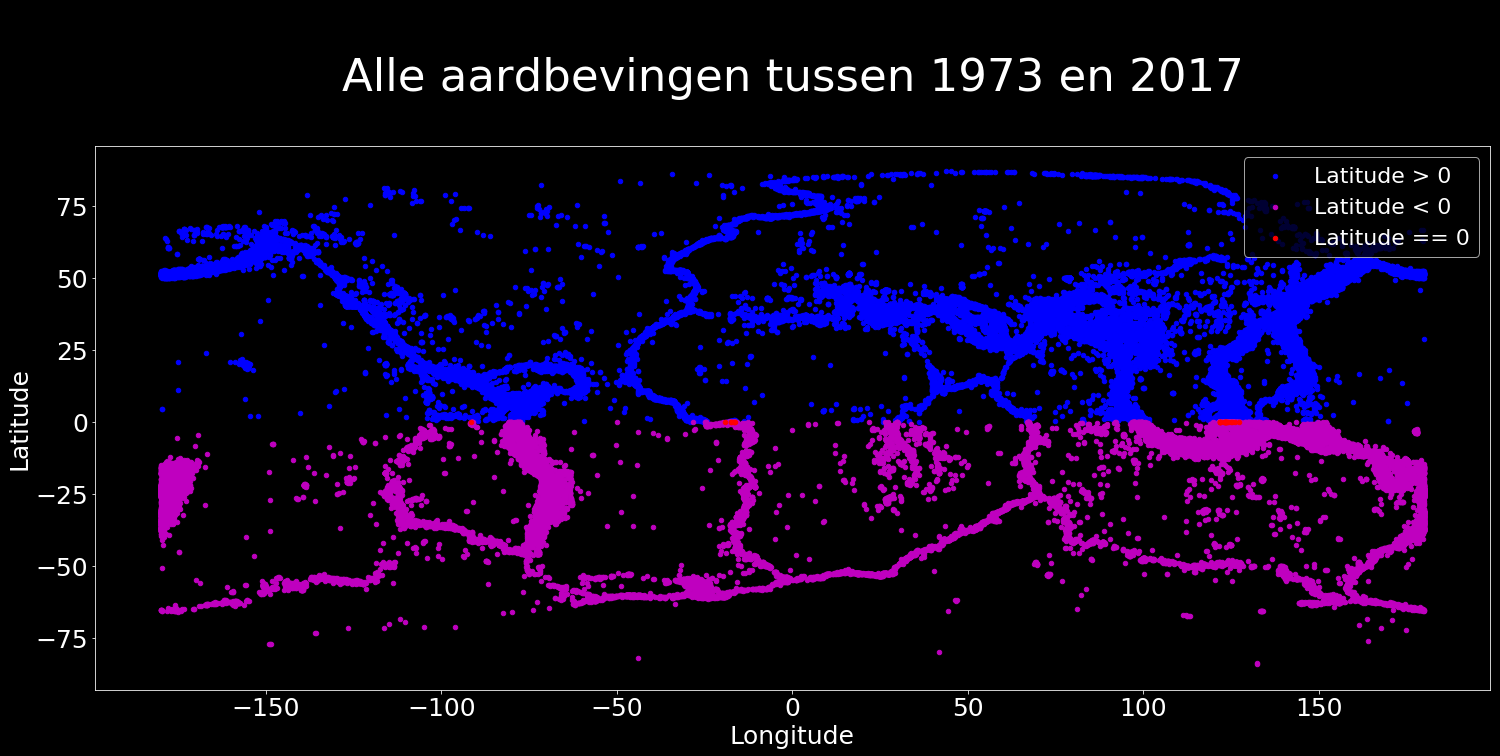

In [34]:
zh = data.loc[data.latitude < 0]
nh = data.loc[data.latitude > 0]
evenaar = data.loc[data.latitude == 0]

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(25,10))

nh.plot('longitude', 'latitude', kind='scatter', color='blue', ax=ax, fontsize=25, label='Latitude > 0')
zh.plot('longitude', 'latitude', kind='scatter', color='m', ax=ax, label='Latitude < 0')
evenaar.plot('longitude', 'latitude', kind='scatter', color='r', ax=ax, label='Latitude == 0')

plt.ylabel('Latitude', fontsize=25)
plt.xlabel('Longitude', fontsize=25)
plt.title('\nAlle aardbevingen tussen 1973 en 2017\n', fontsize=45)
plt.legend(loc=1, fontsize = 22)

plt.show()

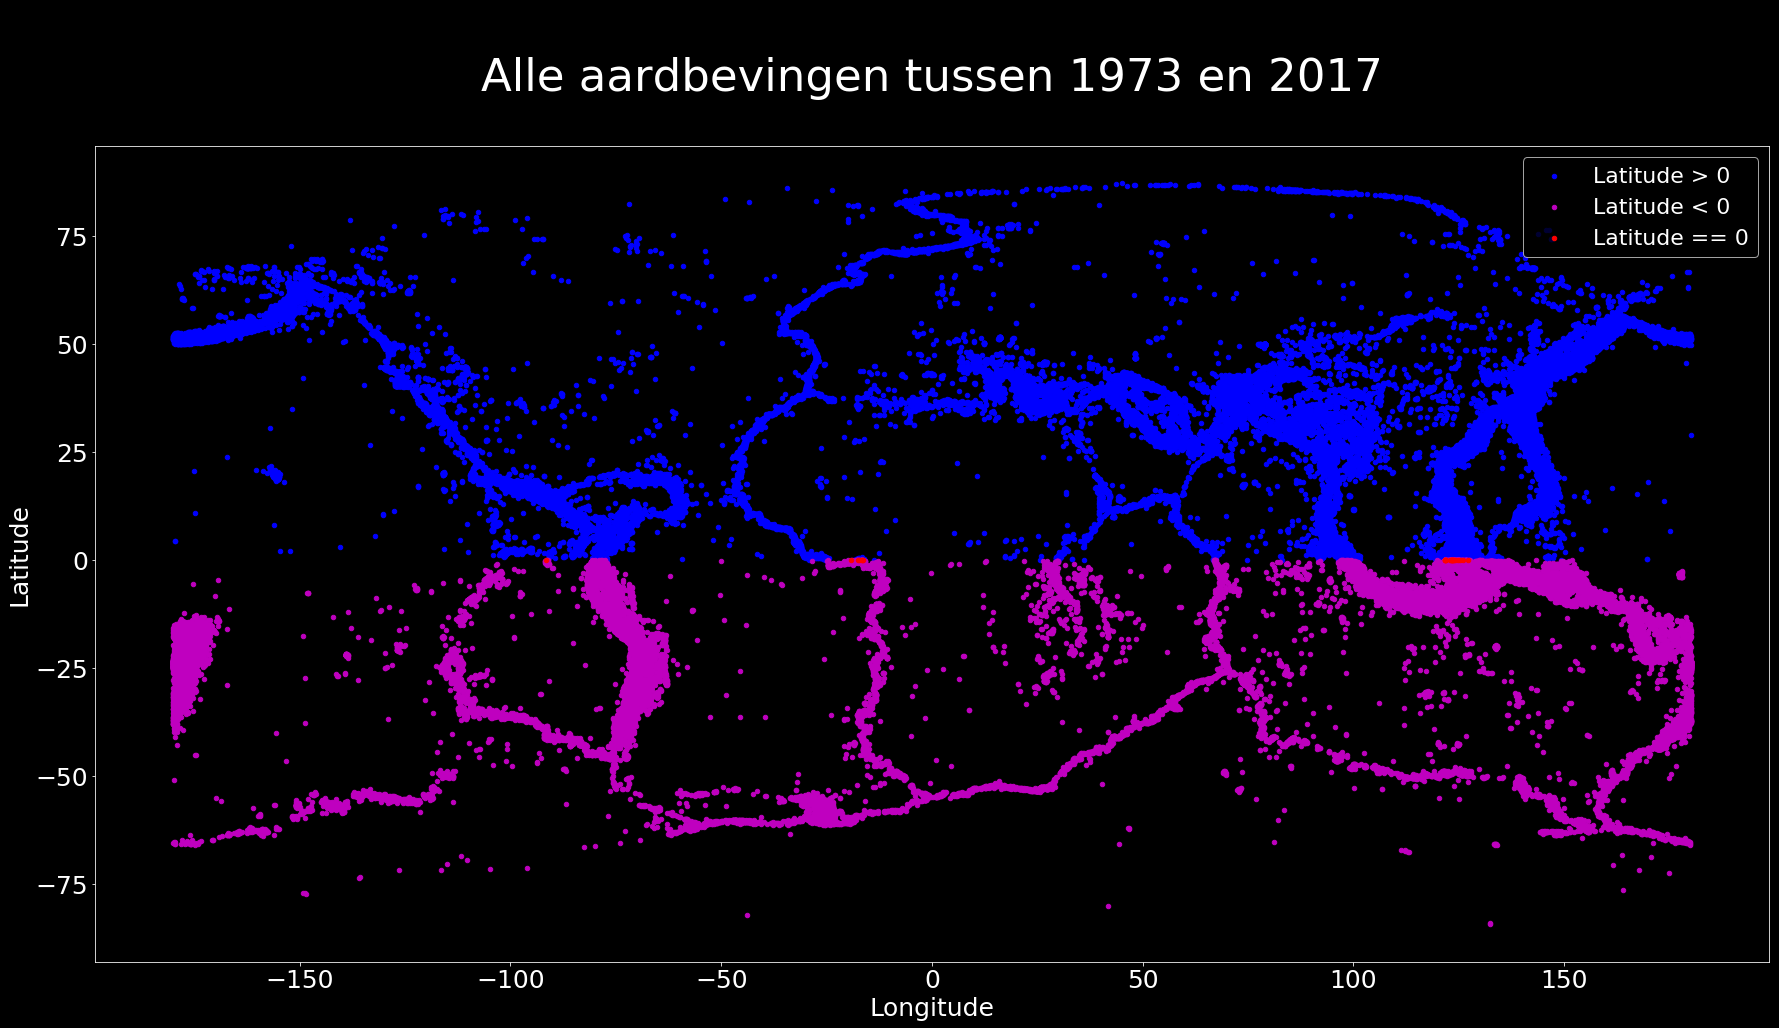

## Op welke diepte komen de meeste aardbevingen voor?

In [15]:
depth_data = data[['depth', 'mag']].groupby('depth').count().rename(columns={'mag': 'Counts'}).sort_values('Counts', ascending = False).reset_index()

In [16]:
depth_data.head(5) 

depth  Counts
0   33.0   46481
1   10.0   43515
2   35.0    8829
3   30.0    3158
4   40.0    1191

## Op welke diepte komen de meeste aardbevingen voor?

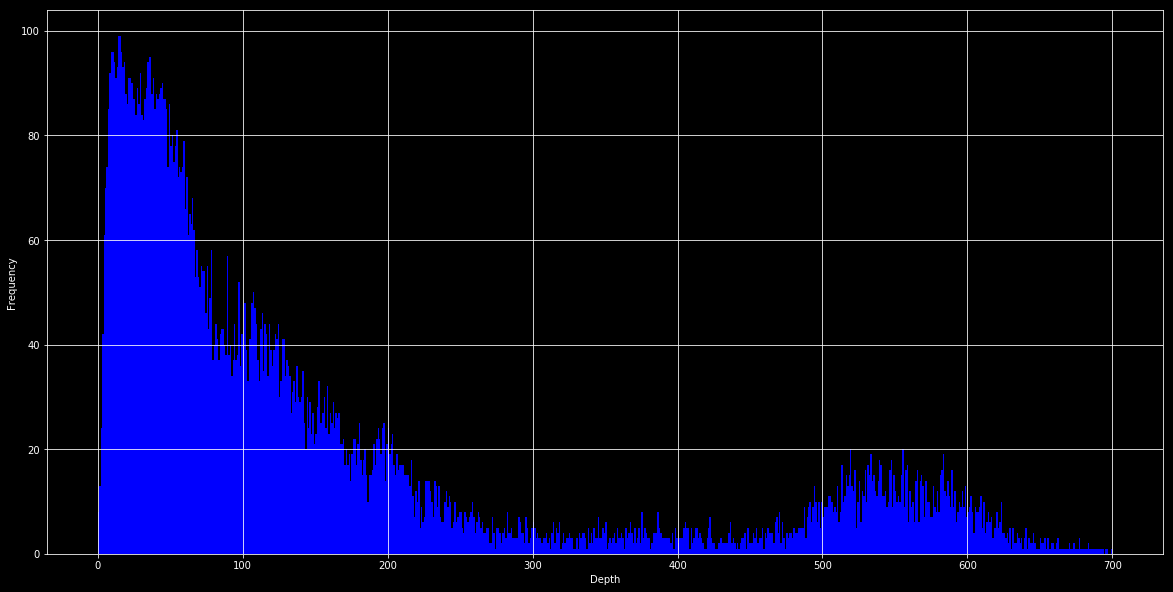

In [17]:
depth_data.plot('Counts',kind='hist', figsize=(20,10), bins=700, color='b', grid=True, legend=False)
plt.xlabel('Depth')
plt.show()

meeste aardbevingen zijn op 33 km diepte, dit is de continentale korst. 

##  Kun je een verband ontdekken tussen diepte en magnitude?

In [18]:
"""mean_magnitude"""
mean_mag = data.groupby('depth')['mag'].mean()

##  Kun je een verband ontdekken tussen diepte en magnitude?

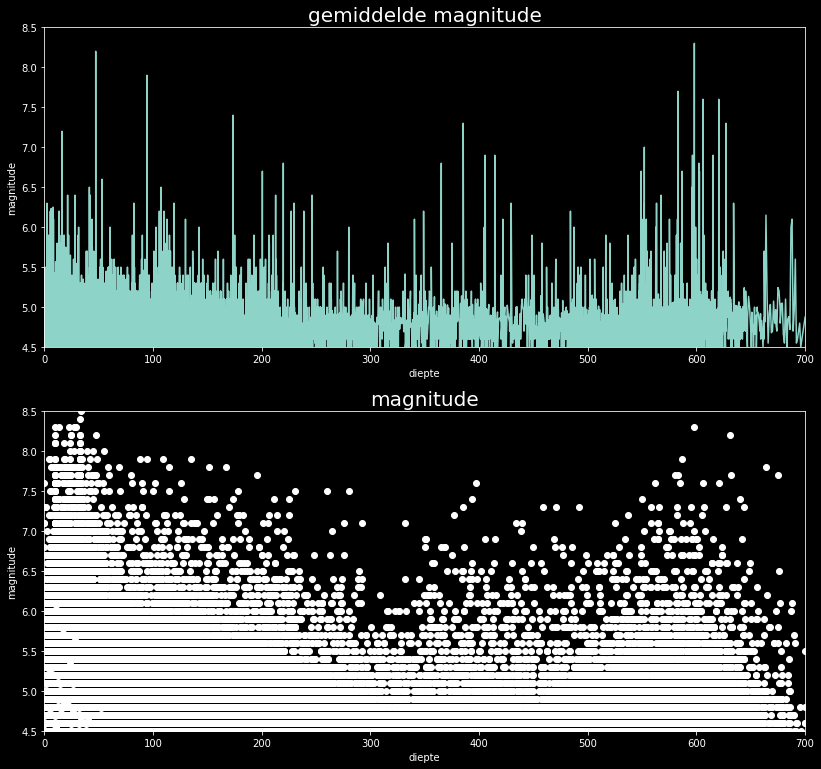

In [19]:
plt.figure(figsize=(30,20))
plt.style.use('dark_background')

ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan = 1) #grid geometry + location
plt.plot(mean_mag)                                #mean magnitude against depth
plt.title('gemiddelde magnitude', fontsize = 20)
plt.xlabel('diepte')
plt.ylabel('magnitude')
plt.xlim([0,700])
plt.ylim([4.5, 8.5])

ax2 = plt.subplot2grid((3, 2), (1, 0), rowspan = 1)
plt.title('magnitude', fontsize = 20)
plt.scatter(data['depth'], data['mag'], color = 'w')
plt.xlim([0,700])
plt.ylim([4.5, 8.5])
plt.xlabel('diepte')
plt.ylabel('magnitude')

plt.show()

##  Kun je een verband ontdekken tussen diepte en magnitude?

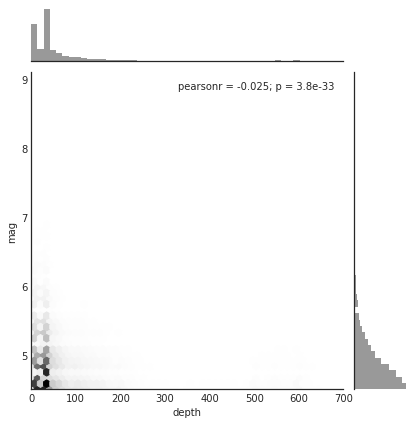

In [20]:
with sns.axes_style("white"):
    sns.jointplot(x='depth', y='mag', data=data, kind="hex", color="k");

op lagere diepte komen veel aardbevingen voor, maar in de mean_mag plot is vlakt dit af: conclusie: op lagere diepte komen vooral veel relatief lichte bevingen voor. 

## Is het aantal aardbevingen rond Haiti flink toegenomen sinds 2010?

In [21]:
haiti = data.loc[data.latitude.between(16.791, 21.235) & data.longitude.between(-75, -71)]
haiti['year'] = haiti.time.dt.year

yearly = haiti.year.value_counts().reset_index()
yearly.rename(columns={'index':'year', 'year':'counts'}, inplace=True)
yearly.sort_values('year', inplace=True)


fig, ax = plt.subplots(figsize=(20,7))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2d'))
sns.regplot(yearly.year,yearly.counts, data=yearly, fit_reg=True, robust=True)

plt.show()

In [22]:
haiti.head()

time  latitude  longitude  depth  mag  year
1464  1973-07-02     17.20     -71.68   25.0  4.8  1973
1765  1973-08-03     19.96     -73.07   37.0  5.2  1973
4392  1974-06-24     19.65     -72.18   33.0  4.7  1974
15259 1977-09-03     18.35     -71.15   50.0  4.5  1977
16633 1978-01-18     18.69     -73.36   13.0  4.9  1978

In [23]:
with sns.axes_style("white"):
    sns.jointplot(x='depth', y='mag', data=haiti, kind="hex", color="k");

## En rond Kathmandu (Nepal) sinds 2015?

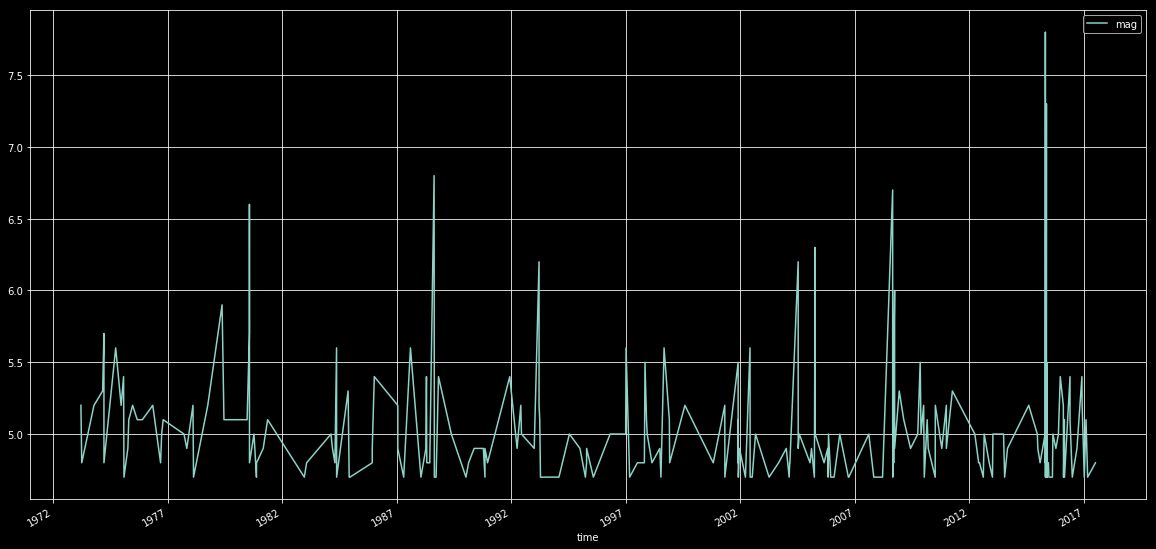

In [24]:
nepal = data.loc[data.latitude.between(26,31) & data.longitude.between(80,88)]
nepal[nepal.mag >= nepal.mag.median()].plot('time', 'mag', kind='line', 
                                           figsize=(20,10), grid =True)
plt.show()


In [25]:
# import dataframes:
df_7314 = pd.read_csv('data/NEIC_global_1973-2014.csv', delimiter=';', header=1, decimal=',', index_col=0) #1973-2014
df_1517 = pd.read_csv('data/query2015_2017.csv') #2015-2017

df_7314['Year'] = df_7314['Year'].astype('str')
df_1517['Year'] = pd.DatetimeIndex(df_1517['time']).year.astype('str') #add column Year


In [26]:
"""Define Geographic area of 26°-28°N, 84°-86°E (<50,000 km^2 around Kathmandu)"""
Nepal_7314 = df_7314.loc[(df_7314['Latit'].between(26, 28)) & (df_7314['Longit'].between(84, 86))]
Nepal_1517 = df_1517.loc[(df_1517['latitude'].between(26, 28)) & (df_1517['longitude'].between(84, 86))]

In [27]:
plt.figure(figsize=(30,20))

# subplot1
ax1 = plt.subplot2grid((2, 8), (1, 0), colspan = 6) #grid geometry + location
ax1.set_ylabel("aantal bevingen > 4,5", fontsize=18)
plt.title("Aardbevingen voor 2014", fontsize = 18) 
plt.hist(Nepal_7314['Year'], bins = 41, color='green',alpha=0.5)
plt.yticks(range(6), ['0', '1', '2', '3', '4', '5'])
plt.xticks(rotation=45, fontsize = 14)

#subplot2
ax2 = plt.subplot2grid((2, 8), (1, 6) , colspan = 1) #grid geometry + location
ax2.set_ylabel("aantal bevingen > 4,5", fontsize=18)
plt.title("Aardbevingen na 2014", fontsize = 18) 
plt.hist(Nepal_1517['Year'], bins = 5, color='green',alpha=0.5)
plt.xticks(rotation=45, fontsize = 14)
plt.ylim([0,5])

plt.show()

In [28]:
plt.figure(figsize=(30,20))
#plt.style.use('classic')


# subplot1
ax1= plt.subplot2grid((2, 8), (1, 0), colspan = 6) #grid geometry + location
ax1.set_ylabel("aantal bevingen > 4,5", fontsize=18)
plt.title("Aardbevingen voor 2014", fontsize = 18) 
plt.hist(Nepal_7314['Year'], bins = 41, color='green',alpha=0.5)
plt.yticks(range(6), ['0', '1', '2', '3', '4', '5'])
#plt.xticks(range(18), Nepal_7314['Year'])
plt.xticks(rotation=45, fontsize = 14)



#subplot2
ax2 = plt.subplot2grid((2, 8), (1, 6) , colspan = 1) #grid geometry + location
ax2.set_ylabel("aantal bevingen > 4,5", fontsize=18)
plt.title("Aardbevingen na 2014", fontsize = 18) 
plt.hist(Nepal_1517['Year'], bins = 5, color='green',alpha=0.5)
#plt.xticks(range(3), ['2015', '2016', '2017'])
plt.xticks(rotation=45, fontsize = 14)
plt.ylim([0,5])


plt.show()

In [29]:
Nepal_7314.tail(5)
Nepal_1517.tail(5)


time  latitude  longitude  depth  mag magType  nst  \
7762   2016-02-05T16:20:11.740Z   27.8782    85.3377  23.53  5.2      mb  NaN   
8041   2016-02-21T18:10:00.970Z   27.9633    84.6943  16.72  5.1      mb  NaN   
8078   2016-02-24T09:22:16.670Z   27.8322    85.7365  10.00  4.7      mb  NaN   
9496   2016-05-11T01:19:42.320Z   27.9448    84.9277  10.23  4.5      mb  NaN   
15598  2017-02-27T04:21:41.730Z   27.3706    85.9319  20.28  4.6      mb  NaN   

         gap   dmin   rms  ...                          place        type  \
7762    44.0  0.166  0.82  ...     19km N of Kathmandu, Nepal  earthquake   
8041    39.0  0.604  0.87  ...    40km NE of Bharatpur, Nepal  earthquake   
8078    49.0  0.391  0.71  ...    24km ENE of Nagarkot, Nepal  earthquake   
9496   104.0  0.414  1.04  ...     45km NW of Kirtipur, Nepal  earthquake   
15598  156.0  0.626  0.69  ...   16km WNW of Ramechhap, Nepal  earthquake   

      horizontalError depthError magError  magNst    status  locationSource  \
7762              9.2        4.4    0.052   120.0  reviewed              us   
8041              7.0        4.5    0.059    94.0  reviewed              us   
8078              6.5        1.9    0.073    57.0  reviewed              us   
9496              5.9        5.3    0.076    50.0  reviewed              us   
15598             7.5        3.7    0.066    69.0  reviewed              us   

       magSource  Year  
7762          us  2016  
8041          us  2016  
8078          us  2016  
9496          us  2016  
15598         us  2017  

[5 rows x 23 columns]